In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [260]:
liver_dis = pd.read_csv("indian_liver_patient.csv")

In [261]:
liver_dis.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [262]:
liver_dis.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [263]:
liver_dis.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [264]:
liver_dis['Gender'] = liver_dis['Gender'].map({'Male': 1, 'Female': 2})

In [265]:
l=[]
for i in range(len(liver_dis['Albumin_and_Globulin_Ratio'].values)):
    if pd.isnull(liver_dis['Albumin_and_Globulin_Ratio'].values[i]) != True:
        l.append(liver_dis['Albumin_and_Globulin_Ratio'].values[i])
np.mean(l)

0.9470639032815199

In [266]:
liver_dis['Albumin_and_Globulin_Ratio'].fillna(value=np.mean(l),inplace=True)

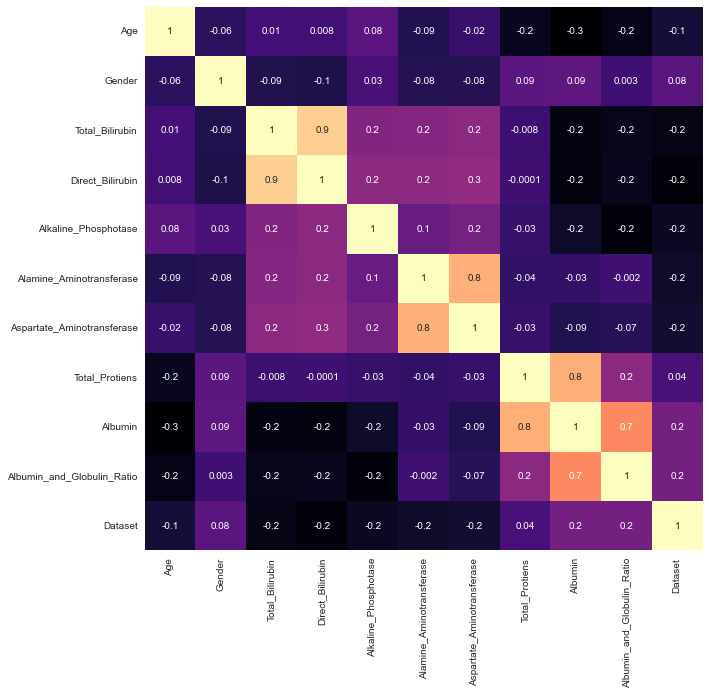

In [267]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(liver_dis.corr(), fmt='.1g', annot=True, cbar=False, cmap="magma");

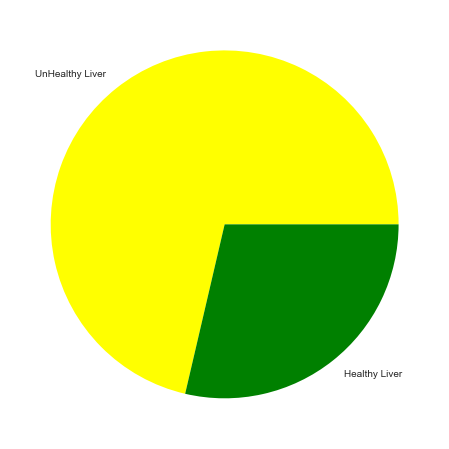

In [268]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=liver_dis["Dataset"].value_counts(), 
        colors=["yellow","green"], 
        labels=["UnHealthy Liver","Healthy Liver"])
plt.show()

In [269]:
indep_data= liver_dis.drop(['Direct_Bilirubin','Dataset'], axis=1)
dep_data= liver_dis['Dataset']

In [270]:
from sklearn.model_selection import train_test_split
indep_train, indep_test, dep_train, dep_test = train_test_split(indep_data, dep_data, test_size=0.25, random_state=42)

In [271]:
from sklearn.preprocessing import StandardScaler
st_sc = StandardScaler()
indep_train = st_sc.fit_transform(indep_train)
indep_test = st_sc.transform(indep_test)

In [272]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100)
model.fit(indep_train,dep_train)

RandomForestClassifier()

In [273]:
from sklearn.metrics import accuracy_score
indep_test_prediction = model.predict(indep_test)
test_data_accuracy = accuracy_score(indep_test_prediction, dep_test)
print('Accuracy: ', test_data_accuracy*100)

Accuracy:  73.97260273972603


In [274]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(indep_train,dep_train)

LogisticRegression()

In [275]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pred_data = classifier.predict(indep_test)
accuracy = accuracy_score(dep_test,pred_data)
print(accuracy)

0.7191780821917808


In [276]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier()
classifier1.fit(indep_train,dep_train)

DecisionTreeClassifier()

In [277]:
pred_test_data1 = classifier1.predict(indep_test)
accuracy = accuracy_score(dep_test,pred_test_data1)
print(accuracy)

0.6917808219178082


In [278]:
from sklearn.neighbors import KNeighborsClassifier
k_classifier= KNeighborsClassifier(n_neighbors=6)
k_classifier.fit(indep_train, dep_train)

KNeighborsClassifier(n_neighbors=6)

In [279]:
pred_d = k_classifier.predict(indep_test)
accuracy = accuracy_score(dep_test,pred_d)
print(accuracy)

0.7054794520547946


In [280]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel='linear', random_state=42)
classifier_svc.fit(indep_train, dep_train)

SVC(kernel='linear', random_state=42)

In [281]:
pred_test_ = classifier_svc.predict(indep_test)
accuracy = accuracy_score(dep_test,pred_test_)
print(accuracy)

0.7465753424657534


In [282]:
data_input = (25,1,0.7,187,16,18,6.8,3.3,0.9)
data_to_numpy= np.asarray(data_input)
reshaped_data = data_to_numpy.reshape(1,-1)
prediction = model.predict(reshaped_data)

if (prediction[0]== 2):
  print('According to the given details person does not have a Liver Disease')
else:
  print('According to the given details person has Liver Disease')

According to the given details person has Liver Disease


In [283]:
import pickle
pickle.dump(model, open('liver_dis.pkl', 'wb'))
